#**SVM Hard Margin**

In [171]:
import numpy as np
import cvxopt
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)


**SVM Hard Margin**

In [172]:
#dataset
X = np.array([[1, 2],[1,4], [2, 3], [3, 1], [4, 3],[4, 0]])
y = np.array([-1, -1,-1, 1, 1,1])
#X = np.array([[2, 3], [3, 4], [4, 5], [1, 1], [2, 2], [3, 1]])
# Labels
#y = np.array([1, 1, 1, -1, -1, -1])

**The dual form of the hard margin SVM problem is**
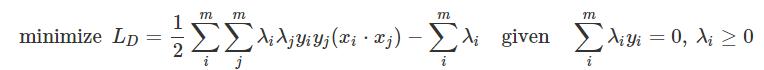



**Standard Form of QP Problem in CVXOPT**

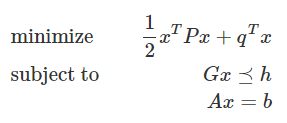



In [173]:
n_samples, n_features = X.shape
# P: Coefficients of the quadratic terms
K = np.dot(X, X.T) * np.outer(y, y)
P=matrix(K,(n_samples,n_samples), 'd')
# q: Coefficients of the linear terms
Q=matrix(-np.ones((n_samples, 1)))
# G: Coefficients for the inequality constraints (Gx <= h)
G = matrix(-np.eye(n_samples))
# h: Bounds for the inequality constraints
h = matrix(np.zeros(n_samples))
# A: Coefficients for the equality constraints (Ax = b)
A = matrix(y, (1, n_samples), 'd')
# b: Bounds for the equality constraints
b = matrix(0.0)

**Solution**

In [174]:
solution = solvers.qp(P, Q, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0: -9.5040e-01 -1.9790e+00  1e+01  3e+00  2e+00
 1: -5.9155e-01 -1.4122e+00  1e+00  2e-01  9e-02
 2: -5.7984e-01 -7.2949e-01  1e-01  2e-16  2e-15
 3: -6.2323e-01 -6.2787e-01  5e-03  6e-17  7e-16
 4: -6.2498e-01 -6.2503e-01  5e-05  2e-16  5e-16
 5: -6.2500e-01 -6.2500e-01  5e-07  2e-16  6e-16
Optimal solution found.


In [175]:
#get alphas
alphas = np.ravel(solution['x'])
alphas=np.round(alphas,6)
print(alphas)

[0.    0.    0.625 0.25  0.375 0.   ]


In [176]:
# Support vectors have non zero lagrange multipliers
sv = alphas > 0
print(sv)

[False False  True  True  True False]


The weight vector w is calculated as:

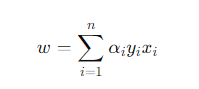


In [177]:
weights=np.dot((y * alphas).T,X)
weights=np.expand_dims(weights, axis=-1)

To calculate the bias term b, we can use one of the support vectors:

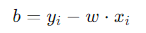


In [178]:
index=np.where(sv==True)[0][0]
b=y[index]-np.dot(weights.T,X[index])
print("bais= ",b)

bais=  [-1.5]


In [179]:
b

array([-1.5])

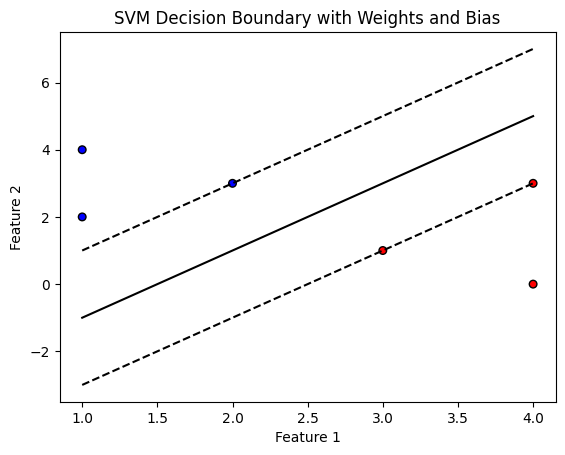

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification



#Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=30, edgecolors='k')

#Plot the decision boundary
# Equation of the decision boundary: w0*x0 + w1*x1 + b = 0
# Solve for x1: x1 = -(w0*x0 + b) / w1
x0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x1 = -(weights[0] * x0 + b) / weights[1]
plt.plot(x0, x1, 'k-')

# Plot the margin boundaries
margin = 1 / np.sqrt(np.sum(weights ** 2))
x1_margin_up = x1 + np.sqrt(1 + (weights[0]/weights[1])**2) * margin
x1_margin_down = x1 - np.sqrt(1 + (weights[0]/weights[1])**2) * margin
plt.plot(x0, x1_margin_up, 'k--')
plt.plot(x0, x1_margin_down, 'k--')

# Highlight the support vectors

# Additional plot settings
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Weights and Bias')
plt.show()


# **SVM Soft Margin**

In [181]:
import numpy as np
import cvxopt
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)


In [182]:
#dataset
X = np.array([[1, 2], [2, 3], [3, 3], [2, 1], [3, 2]])
y = np.array([1, 1, 1, -1, -1])
c=1
#X = np.array([[2, 3], [3, 4], [4, 5], [1, 1], [2, 2], [3, 1]])
# Labels
#y = np.array([1, 1, 1, -1, -1, -1])

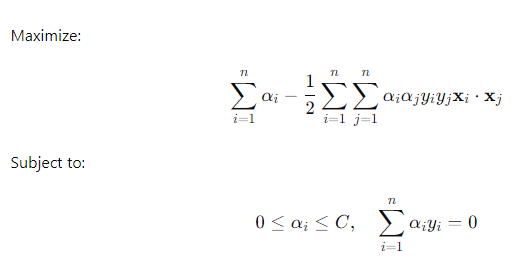


**Standard Form of QP Problem in CVXOPT**

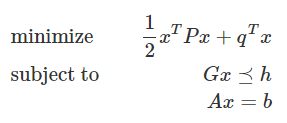



In [183]:
n_samples, n_features = X.shape
# P: Coefficients of the quadratic terms
K = np.dot(X, X.T) * np.outer(y, y)
P=matrix(K,(n_samples,n_samples), 'd')
# q: Coefficients of the linear terms
Q=matrix(-np.ones((n_samples, 1)))
# G: Coefficients for the inequality constraints (Gx <= h)
G = matrix(np.append(-np.eye(n_samples),np.eye(n_samples),axis=0))
# h: Bounds for the inequality constraints
h = matrix(np.append(np.zeros(n_samples),c*np.ones(n_samples),axis=0))
# A: Coefficients for the equality constraints (Ax = b)
A = matrix(y, (1, n_samples), 'd')
# b: Bounds for the equality constraints
b = matrix(0.0)

In [184]:
solution = solvers.qp(P, Q, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0: -1.4898e+00 -7.5816e+00  6e+00  2e-16  1e-15
 1: -1.6002e+00 -2.1180e+00  5e-01  1e-16  2e-15
 2: -1.7744e+00 -1.8313e+00  6e-02  1e-16  1e-15
 3: -1.7777e+00 -1.7793e+00  2e-03  1e-16  3e-15
 4: -1.7778e+00 -1.7778e+00  2e-05  2e-16  2e-15
 5: -1.7778e+00 -1.7778e+00  2e-07  2e-16  2e-15
Optimal solution found.


In [185]:
#get alphas
alphas = np.ravel(solution['x'])
alphas=np.round(alphas,6)
print(alphas)

[0.555556 0.       0.888889 0.444444 1.      ]


The weight vector w is calculated as:

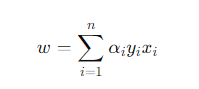


In [186]:
weights=np.dot((y * alphas).T,X)
weights=np.expand_dims(weights, axis=-1)
print("weights= ",weights)

weights=  [[-0.666665]
 [ 1.333335]]


In [187]:
dotP=np.dot(X,weights)
fIndex=np.where(y == -1)[0][0]
b=-0.5*(min(dotP[0:fIndex])+max(dotP[fIndex:]))
print("bias= ",b)

bias=  [-1.33334]


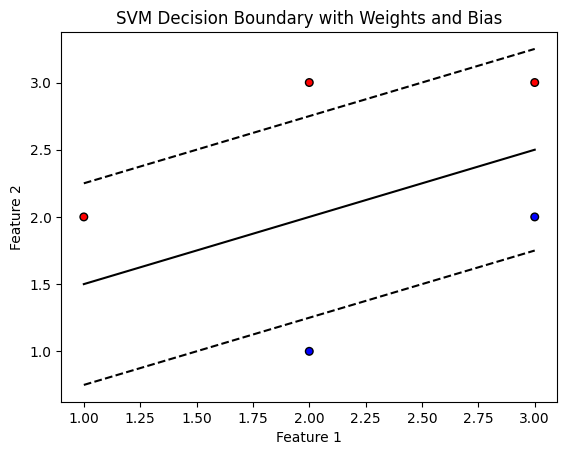

In [188]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification



#Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=30, edgecolors='k')

#Plot the decision boundary
# Equation of the decision boundary: w0*x0 + w1*x1 + b = 0
# Solve for x1: x1 = -(w0*x0 + b) / w1
x0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x1 = -(weights[0] * x0 + b) / weights[1]
plt.plot(x0, x1, 'k-')

# Plot the margin boundaries
margin = 1 / np.sqrt(np.sum(weights ** 2))
x1_margin_up = x1 + np.sqrt(1 + (weights[0]/weights[1])**2) * margin
x1_margin_down = x1 - np.sqrt(1 + (weights[0]/weights[1])**2) * margin
plt.plot(x0, x1_margin_up, 'k--')
plt.plot(x0, x1_margin_down, 'k--')

# Highlight the support vectors

# Additional plot settings
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Weights and Bias')
plt.show()


#**General SVM with Kernal**

In [189]:
import numpy as np
import cvxopt
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)


In [190]:
def linear(x,y):
  return np.dot(X, y.T)

def poly(x,y,constant=1,degree=3):
  return (np.dot(x, y.T)+constant)**degree

def RPF(x,y,gamma=2):
  # Compute the squared Euclidean distance in a vectorized way
  X_norm = np.sum(x**2, axis=1).reshape(-1, 1)
  Y_norm = np.sum(y**2, axis=1).reshape(1, -1)
  K = np.exp(-gamma * (X_norm + Y_norm - 2 * np.dot(x, y.T)))
  return K

class SVM:
  def __init__(self,kernal):
    self.kernal=kernal

  def __computeW(self,x,y,alphas):
    return np.expand_dims(np.dot((y * alphas).T,x), axis=-1)

  def __computeB(self,x,weights,y):
    dotP=self.kernal(x,weights.T)
    fIndex=np.where(y == -1)[0][0]
    return -0.5*(min(dotP[0:fIndex])+max(dotP[fIndex:]))

  def fit(self,x,y,c=1):
    n_samples, n_features = X.shape
    # P: Coefficients of the quadratic terms
    K = self.kernal(x,x) * np.outer(y, y)
    P=matrix(K,(n_samples,n_samples), 'd')
    # q: Coefficients of the linear terms
    Q=matrix(-np.ones((n_samples, 1)))
    # G: Coefficients for the inequality constraints (Gx <= h)
    G = matrix(np.append(-np.eye(n_samples),np.eye(n_samples),axis=0))
    # h: Bounds for the inequality constraints
    h = matrix(np.append(np.zeros(n_samples),c*np.ones(n_samples),axis=0))
    # A: Coefficients for the equality constraints (Ax = b)
    A = matrix(y, (1, n_samples), 'd')
    # b: Bounds for the equality constraints
    b = matrix(0.0)
    solution = solvers.qp(P, Q, G, h, A, b)
    alphas = np.ravel(solution['x'])
    alphas=np.round(alphas,6)
    self.weights=self.__computeW(x,y,alphas)
    print("weights= ",self.weights)
    self.b=self.__computeB(x,self.weights,y)
    print("bais= ",self.b)
  def predict(self,x):
      return np.sign(self.kernal(x,self.weights.T)+self.b)

In [191]:
svm=SVM(poly)

In [192]:
X = np.array([[1, 2], [2, 3], [3, 3], [2, 1], [3, 2]])
y = np.array([1, 1, 1, -1, -1])

In [193]:
svm.fit(X,y)

     pcost       dcost       gap    pres   dres
 0: -7.4238e-02 -6.0425e+00  2e+01  2e+00  3e-14
 1: -6.8423e-02 -2.4625e+00  4e+00  2e-01  4e-14
 2:  2.7774e-02 -4.7841e-01  7e-01  2e-02  5e-14
 3:  1.1554e-03 -3.4825e-02  4e-02  3e-05  1e-14
 4: -9.1750e-03 -1.1875e-02  3e-03  1e-16  8e-16
 5: -1.0798e-02 -1.1238e-02  4e-04  1e-16  4e-16
 6: -1.1085e-02 -1.1096e-02  1e-05  2e-16  5e-16
 7: -1.1088e-02 -1.1088e-02  1e-07  1e-16  8e-16
 8: -1.1088e-02 -1.1088e-02  1e-09  1e-16  6e-16
Optimal solution found.
weights=  [[-0.010689]
 [ 0.011289]]
bais=  [-0.988606]


In [194]:
svm.predict(X)

array([[ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.]])

#**Experiment**

In [195]:
import pandas as pd
from sklearn import svm
import glob
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

In [196]:
def extractData(filename):
  data=pd.read_csv(filename, sep="\t", header=None)
  labels=data.iloc[:,-1:]
  features=data.iloc[:,:-1]
  return features,labels

In [197]:
alltxts = glob.glob("/content/" + '/*.txt')
allData=[]
allSvms=[]
kernals=["linear", "poly", "rbf", "sigmoid"]
for filename in alltxts:
  allData.append(extractData(filename))
for dataset in allData:
  x=np.array(dataset[0])
  y=np.array(dataset[1])
  labels=np.unique(y)
  allKernals=[]
  for i in kernals:
    SVM=svm.SVC(kernel=i)
    SVM.fit(x,y)
    allKernals.append(SVM)
  allSvms.append(allKernals)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [198]:
allSvms

[[SVC(kernel='linear'), SVC(kernel='poly'), SVC(), SVC(kernel='sigmoid')],
 [SVC(kernel='linear'), SVC(kernel='poly'), SVC(), SVC(kernel='sigmoid')],
 [SVC(kernel='linear'), SVC(kernel='poly'), SVC(), SVC(kernel='sigmoid')],
 [SVC(kernel='linear'), SVC(kernel='poly'), SVC(), SVC(kernel='sigmoid')],
 [SVC(kernel='linear'), SVC(kernel='poly'), SVC(), SVC(kernel='sigmoid')],
 [SVC(kernel='linear'), SVC(kernel='poly'), SVC(), SVC(kernel='sigmoid')],
 [SVC(kernel='linear'), SVC(kernel='poly'), SVC(), SVC(kernel='sigmoid')],
 [SVC(kernel='linear'), SVC(kernel='poly'), SVC(), SVC(kernel='sigmoid')]]

<ipython-input-199-9ff7bf392079>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(len(allData)+1, len(kernals) + 1, i)


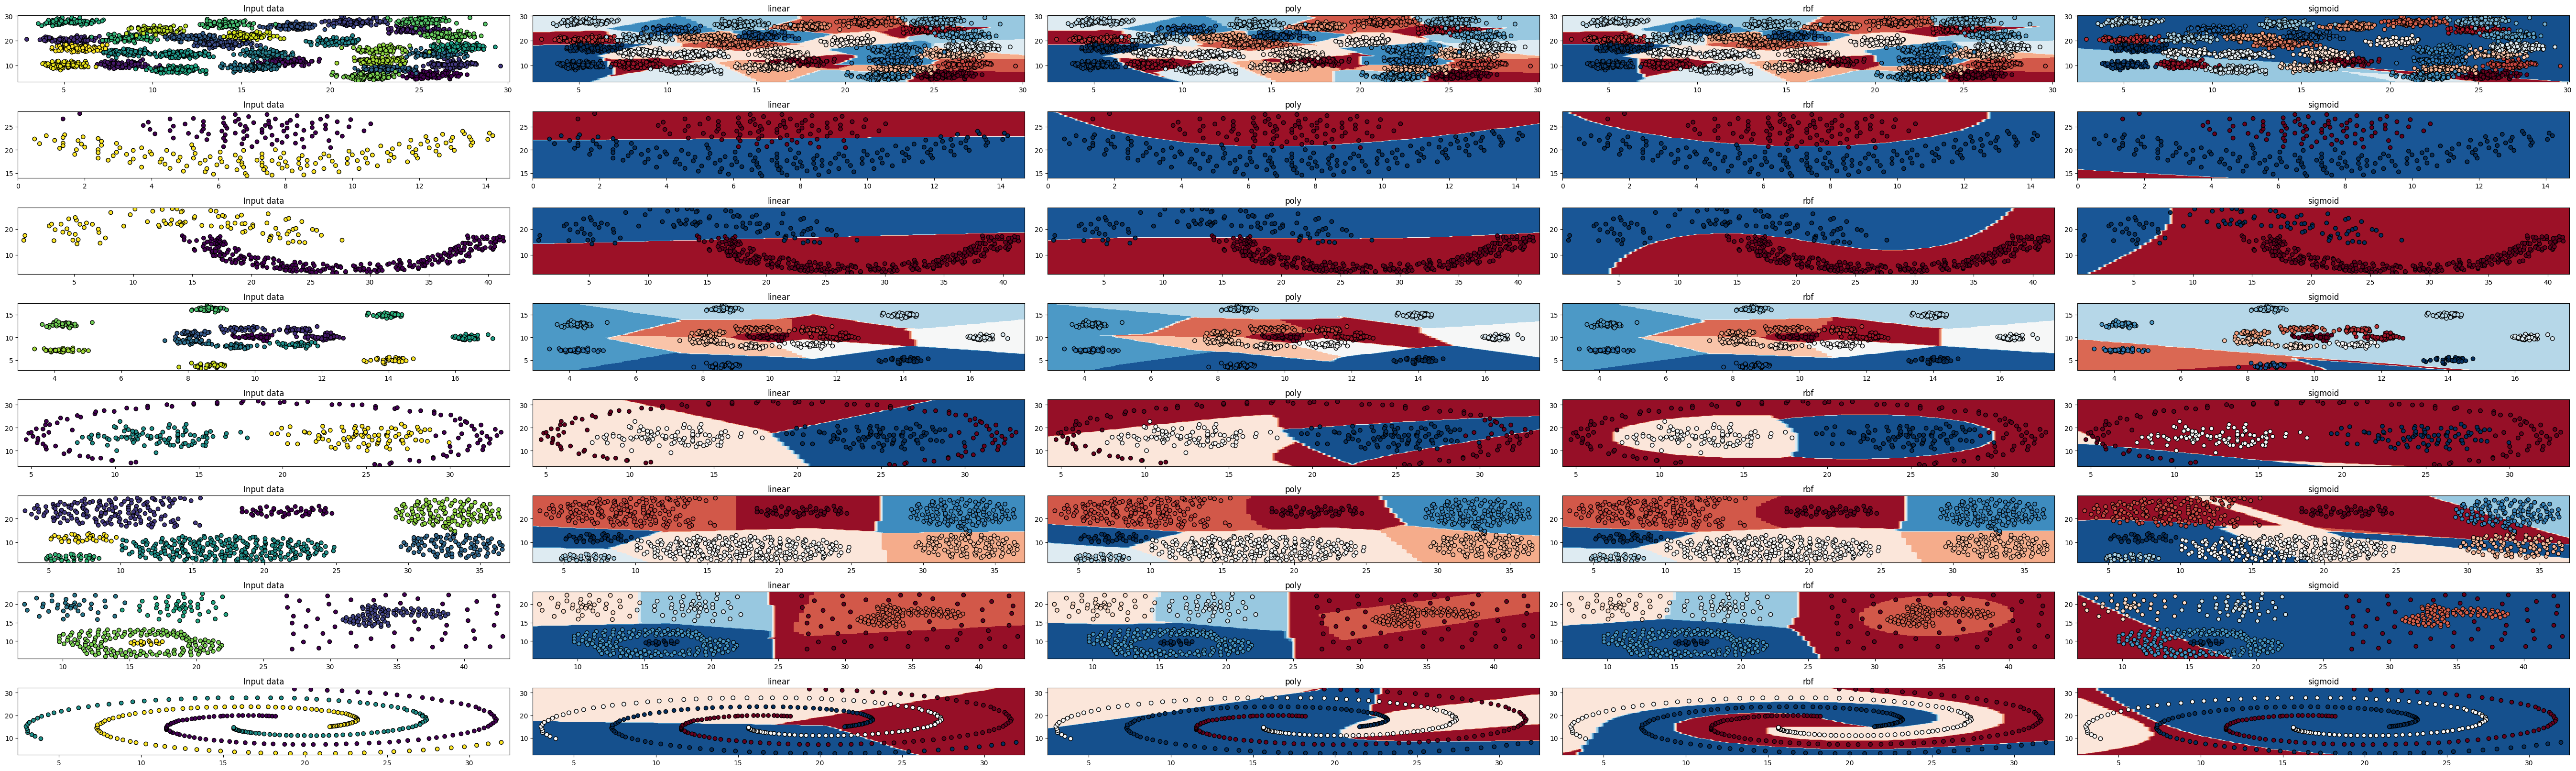

In [199]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay



fig, ax = plt.subplots(figsize=(27*2, 9*2))
i = 1
for idx,dataset in enumerate(allData):
  x=np.array(dataset[0])
  y=np.array(dataset[1])
  ax = plt.subplot(len(allData)+1, len(kernals) + 1, i)
  ax.set_title("Input data")
  x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
  y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
  ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))
  ax.scatter(x[:, 0], x[:, 1],c=y, edgecolors="k")
  i+=1
  for kixd,svm in enumerate(allSvms[idx]):
    ax = plt.subplot(len(allData)+1, len(kernals) + 1, i)
    clf=svm
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    # Settings for plotting

    x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": x, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        alpha=1,
        cmap=cm,
        eps=1
    )

  # Plot samples by color and add legend
    ax.scatter(x[:, 0], x[:, 1], c=y,cmap=cm, edgecolors="k")
    ax.set_title(kernals[kixd])
    i+=1
plt.tight_layout()
plt.show()
